# Part II - Loan Slide Deck
## by Kingsley Ubani


## Investigation Overview

- I examined the features of loans that could affect a borrower's interest rate and loan status. I also considered the relationship between the borrower's interest and other variables.


## Dataset Overview

- This data contains the Loan Data-Set from Prosper. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the Loan data-set
loan_df = pd.read_csv('prosperLoanData.csv')

# Select the columns of interest for exploration and assign to the spec_columns variable
# Also assign the spec_columns to a new Dataframe, 'newloan_data'
spec_columns = ['LoanStatus', 'CreditGrade', 'EmploymentStatus','Occupation','IsBorrowerHomeowner','IncomeRange',
        'IncomeVerifiable', 'LoanOriginalAmount', 'Term', 'BorrowerRate']
newloan_data = loan_df[spec_columns]

In [3]:
# convert LoanStatus, EmploymentStatus,CreditGrade into ordered categorical types
convtd_cols = {'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','FinalPaymentInProgress','Cancelled','Past Due'],
                 'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
                 'CreditGrade': ['C','D','B','AA','HR','A','E','NC']}

for var in convtd_cols:
    ordered_cols = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = convtd_cols[var])
    newloan_data[var] = newloan_data[var].astype(ordered_cols)

In [4]:
newloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   LoanStatus           111870 non-null  category
 1   CreditGrade          28953 non-null   category
 2   EmploymentStatus     111682 non-null  category
 3   Occupation           110349 non-null  object  
 4   IsBorrowerHomeowner  113937 non-null  bool    
 5   IncomeRange          113937 non-null  object  
 6   IncomeVerifiable     113937 non-null  bool    
 7   LoanOriginalAmount   113937 non-null  int64   
 8   Term                 113937 non-null  int64   
 9   BorrowerRate         113937 non-null  float64 
dtypes: bool(2), category(3), float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [5]:
newloan_data.shape

(113937, 10)

### BorrowerRate

Borrower's rate has a multimodal distribution with the highest spike at 0.3177 interest rate. This means most borrowers prefer to borrow at 0.3177 interest rate, as it has the greatest number.


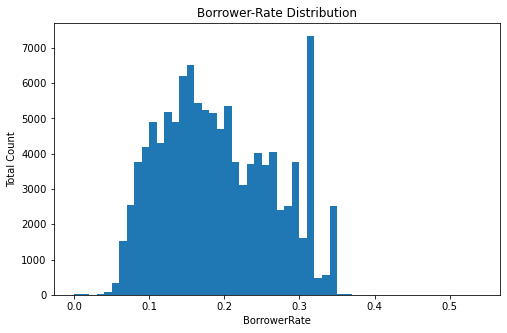

In [6]:
# Looking at the distribution of 'Borrower APR', using a histogram.
plt.figure(figsize = [8, 5]) 
bins = np.arange(0, newloan_data.BorrowerRate.max() + 0.05, 0.01)
plt.hist(data = newloan_data, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Total Count')
plt.title('Borrower-Rate Distribution');

### Analysis on the Numerical Variables

From the visuals, BorrowerRate and the LoanOriginalAmount are negatively correlated. This means that the higher the LoanOriginalAmount, the lower the BorrowerRate and vice-versa.

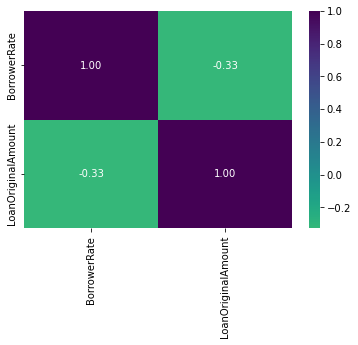

In [7]:
# Assigning all numerical columns to num_cols
num_cols1 = ['BorrowerRate','LoanOriginalAmount']

# Analysis on the num_cols1
sb.heatmap(newloan_data[num_cols1].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 90);

### Analysis on the Numerical and Categorical Variables

The following insights can be gotten from the visuals;

- **Loan Status** - Defaulted and Charged-off borrowers had higher interest. This is actually normal, as they have are defaulters.

- **Employment Status** - All borrowers within the employment status bucket are given reasonably higher interest rate, except for the borrowers whose employment status is Not-Available.

- **Credit Grade** - The borrowers with the higher interest rates in this category fall within D, E and HR Credit Grades.



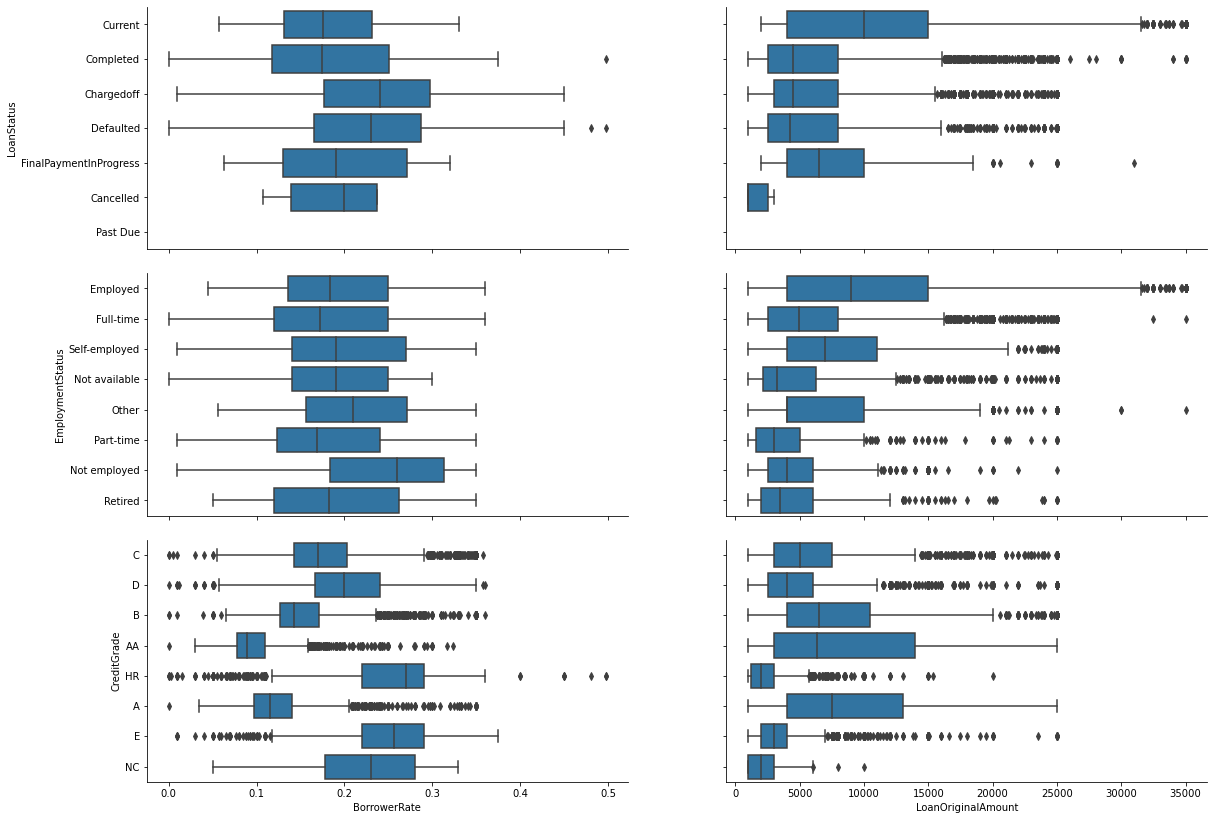

In [8]:
# Analysis on the num_cols and categ_cols

base_color = sb.color_palette()[0]
g = sb.PairGrid(data = newloan_data, x_vars =['BorrowerRate','LoanOriginalAmount'],
               y_vars = ['LoanStatus','EmploymentStatus','CreditGrade'])
g.map(sb.boxplot, color = base_color)
g.fig.set_size_inches(18,12);

### Looking at the relationship between LoanStatus and other variables

The following insights can be gotten from the visuals;

- Verified borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Employed borrowers were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers willing to pay within 36 month term were give more loans and out of this number, majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers that fall within the C credit-grade were give more loans and out of this number, majority of the loans were allocated to mostly borrowers with completed and charged-off loan status.

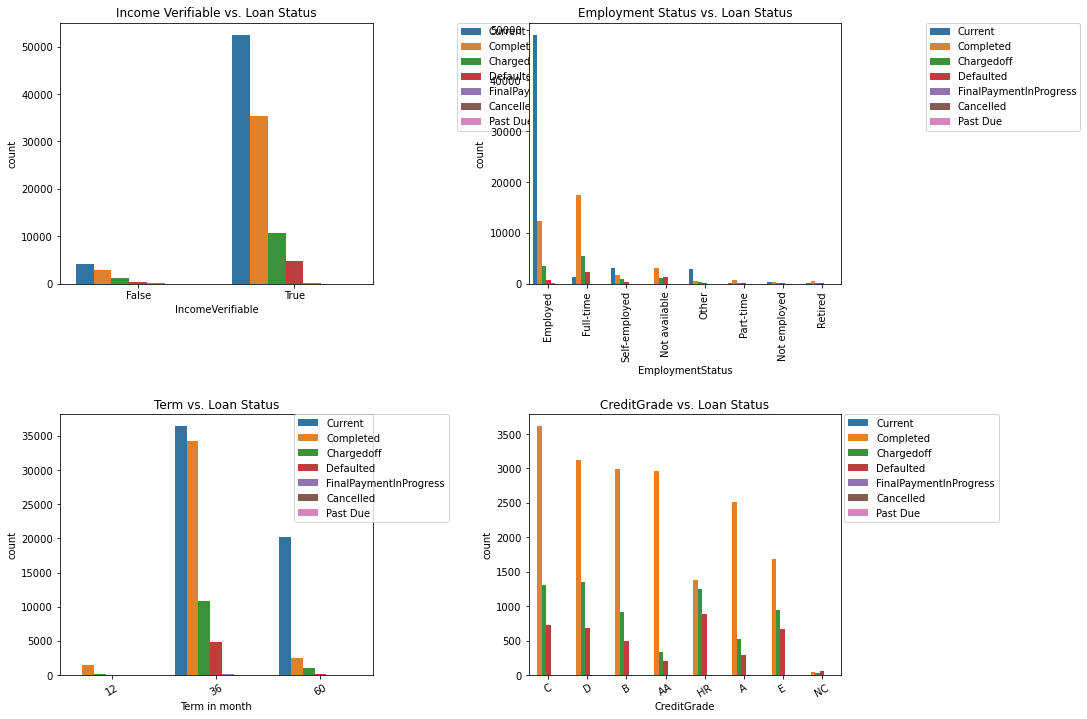

In [9]:
# Looking at the relationship between LoanStatus and other variables

plt.figure(figsize=[14, 12])

#subplot 1
plt.subplot(2,2,1)
sb.countplot(data = newloan_data, x = 'IncomeVerifiable', hue = 'LoanStatus')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0) # push the legend to the side
plt.title('Income Verifiable vs. Loan Status');


#subplot 2
plt.subplot(2,2,2)
sb.countplot(data = newloan_data, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

#subplot 3
plt.subplot(2,2,3)
sb.countplot(data = newloan_data, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(0.75, 1),
           borderaxespad=0)
plt.xlabel('Term in month')
plt.title('Term vs. Loan Status');

#subplot 4
plt.subplot(2,2,4)
sb.countplot(data = newloan_data, x = 'CreditGrade', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('CreditGrade vs. Loan Status');

plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5);


### Looking at more relationships between LoanStatus and other variables

The following insights can be gotten from the visuals;

- Borrowers with income range between $25,000-74,999 were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

- Borrowers that are home owners were clearly given more loans and out of this number,majority of the loans were allocated to mostly borrowers with current and completed loan status.

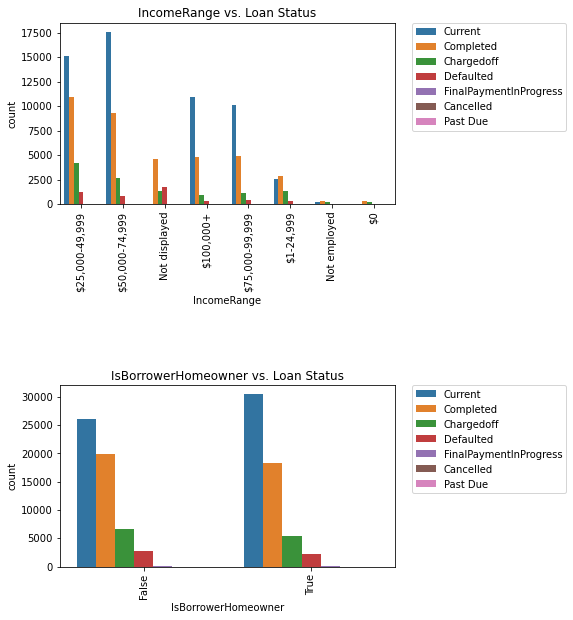

In [10]:
# Looking at more relationships between LoanStatus and other variables

plt.figure(figsize=[6, 10])
#subplot 5
plt.subplot(2,1,1)
sb.countplot(data = newloan_data, x = 'IncomeRange', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1),
           borderaxespad=0)
plt.title('IncomeRange vs. Loan Status');

#subplot 6
plt.subplot(2,1,2)
sb.countplot(data = newloan_data, x = 'IsBorrowerHomeowner', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1),
           borderaxespad=0)
plt.title('IsBorrowerHomeowner vs. Loan Status');

plt.subplots_adjust(hspace=1)

### Investigating relationships between more variables in the data-set I

The chart clearly shows that the relationship between BorrowerRate and CreditGrade contained only the 36-month term. Nonetheless, the HR had the highest borrower rate for the 36-month term as shown in the chart.

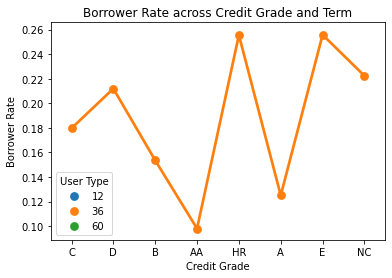

In [11]:
# Analysis on CreditGrade, BorrowerRate and Term

sb.pointplot(data=newloan_data, x='CreditGrade', y='BorrowerRate', hue='Term', errwidth=0)
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate across Credit Grade and Term')
plt.legend(title='User Type')
plt.show()

### Investigating relationships between more variables in the data-set II

The chart shows that the loan original amount is way lesser for borrower's that don't own a house through out the term period.

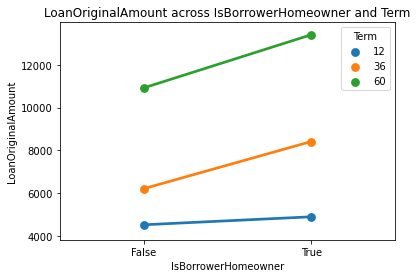

In [12]:
# Analysis on IsBorrowerHomeowner, LoanOriginalAmount and Term

sb.pointplot(data=newloan_data, x='IsBorrowerHomeowner', y='LoanOriginalAmount', hue='Term', errwidth=0)
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount across IsBorrowerHomeowner and Term')
plt.legend(title='Term')
plt.show()

### Investigating relationships between more variables in the data-set III

From the chart, there's no loan original amount for the employed category. Also, it is worthy to note that the AA credit grade category has the highest loan original amount across all the employment status except for the Retired which had the A credit grade having the highest loan original amount.

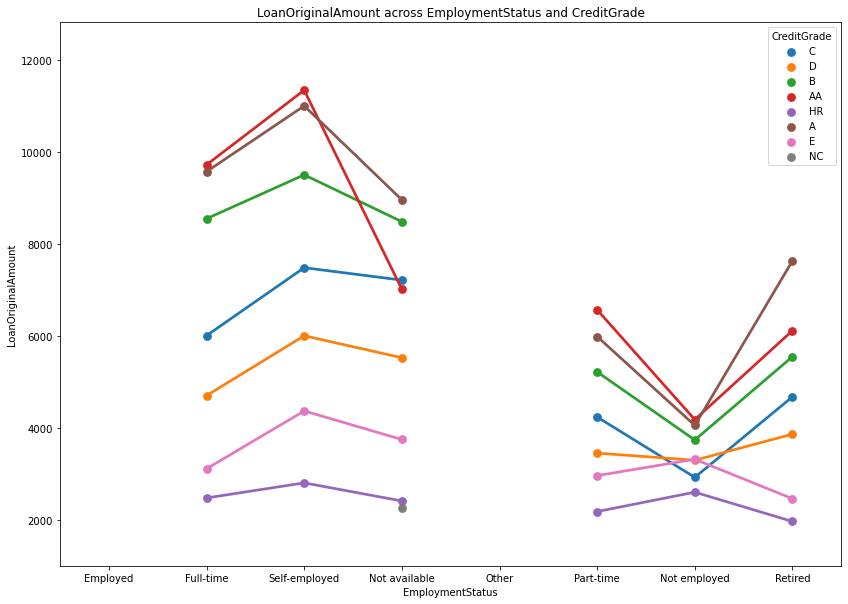

In [13]:
# Analysis on LoanOriginalAmount, EmploymentStatus and CreditGrade

fig = plt.figure(figsize=[14,10])
sb.pointplot(data=newloan_data, x='EmploymentStatus', y='LoanOriginalAmount', hue='CreditGrade', errwidth=0)
plt.xlabel('EmploymentStatus')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount across EmploymentStatus and CreditGrade')
plt.legend(title='CreditGrade')
plt.show()

### Conclusions

- The following(not limited to this) factors determine the Loan outcome status of a borrower; CreditGrade, EmploymentStatus, Occupation, IsBorrowerHomeowner, IncomeRange, IncomeVerifiable, LoanOriginalAmount, Term, BorrowerRate.

- Also, the following(not limited to this) factors affect the interest rate of a borrower; CreditGrade, EmploymentStatus, Occupation, IsBorrowerHomeowner, IncomeRange, IncomeVerifiable, LoanOriginalAmount, Term, BorrowerRate.

- Finally, The loan original amount is way lesser for borrowers that don't own a house through out a term-period. This means there is a difference in loans depending on the loan original amount.

In [ ]:
!jupyter nbconvert Kingsley_Ubani_slide_deck_Final.ipynb --to slides --post serve --no-input --no-prompt